In [35]:
"""
numerical simulation of ASC signals
including ITMs curvature-mismatches, and BS/SRM tilting
"""

from AS36num_vII import SideBand
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as scc
%matplotlib inline

SB=SideBand()
f9=9099451
f45=45497255
w9=f9*2.*np.pi
w45=f45*2.*np.pi

c = scc.c # speed pf light
lambda_0 = 1064 * 1.e-9
k_0 = 2.*np.pi/lambda_0
omega_0 = k_0 * c


In [2]:
w_list=np.array([w9, -w9, w45, -w45])
w_name=['9 MHz', '-9 MHz', '45 MHz', '-45 MHz']

In [3]:
"""
Misaligning either BS or SRM, no radius mismatch
basically some sanity checks
"""
E_bs_t_ideal=np.zeros([4, 3], dtype=np.complex)
E_bs_r_ideal=np.zeros([4, 3], dtype=np.complex)

E_srm_t_ideal=np.zeros([4, 3], dtype=np.complex)
E_srm_r_ideal=np.zeros([4, 3], dtype=np.complex)

for z in range(len(w_list)):
    E_bs_t_ideal[z, :]=SB.t_dm(w_list[z], Th_BS=1.e-2)[:, 0]*np.sign(w_list[z]) 
    # note that the lower side band should be 180 deg out of phase from the upper one
    E_bs_r_ideal[z, :]=SB.r_dm(w_list[z], Th_BS=1.e-2)[:, 0]*np.sign(w_list[z])
    
    E_srm_t_ideal[z, :]=SB.t_dm(w_list[z], Th_SRM=1.e-2)[:, 0]*np.sign(w_list[z])
    E_srm_r_ideal[z, :]=SB.r_dm(w_list[z], Th_SRM=1.e-2)[:, 0]*np.sign(w_list[z])

In [4]:
# print out the E-fields for BS tilting
print(np.abs(E_bs_t_ideal[0, 0]), np.angle(E_bs_t_ideal[0, 0], deg=True), '9, 00') 
print(np.abs(E_bs_t_ideal[0, 1]), np.angle(E_bs_t_ideal[0, 1], deg=True), '9, 10' )
print(np.abs(E_bs_t_ideal[1, 0]), np.angle(E_bs_t_ideal[0, 0], deg=True), '-9, 00')
print(np.abs(E_bs_t_ideal[1, 1]), np.angle(E_bs_t_ideal[1, 1], deg=True), '-9, 10')
print( np.abs(E_bs_t_ideal[2, 0]), np.angle(E_bs_t_ideal[2, 0], deg=True), '45, 00' )
print( np.abs(E_bs_t_ideal[2, 1]), np.angle(E_bs_t_ideal[2, 1], deg=True), '45, 10' )
print( np.abs(E_bs_t_ideal[3, 0]), np.angle(E_bs_t_ideal[3, 0], deg=True), '-45, 00' )
print( np.abs(E_bs_t_ideal[3, 1]), np.angle(E_bs_t_ideal[3, 1], deg=True), '-45, 10' )


0.0612451523198 -164.194378137 9, 00
0.00118719358791 -39.1429654798 9, 10
0.0612451286401 -164.194378137 -9, 00
0.0017054147884 -69.2457445638 -9, 10
0.972084214419 178.872692333 45, 00
0.00455229371369 22.3181868538 45, 10
0.972080831512 -178.878068704 -45, 00
0.00443274122248 16.8776075148 -45, 10


In [7]:
# print out the E-fields for SRM tilting
print (np.abs(E_srm_t_ideal[0, 0]), np.angle(E_srm_t_ideal[0, 0], deg=True), '9, 00' )
print (np.abs(E_srm_t_ideal[0, 1]), np.angle(E_srm_t_ideal[0, 1], deg=True), '9, 10' )
print (np.abs(E_srm_t_ideal[1, 0]), np.angle(E_srm_t_ideal[0, 0], deg=True), '-9, 00' )
print (np.abs(E_srm_t_ideal[1, 1]), np.angle(E_srm_t_ideal[1, 1], deg=True), '-9, 10' )
print (np.abs(E_srm_t_ideal[2, 0]), np.angle(E_srm_t_ideal[2, 0], deg=True), '45, 00' )
print (np.abs(E_srm_t_ideal[2, 1]), np.angle(E_srm_t_ideal[2, 1], deg=True), '45, 10' )
print (np.abs(E_srm_t_ideal[3, 0]), np.angle(E_srm_t_ideal[3, 0], deg=True), '-45, 00' )
print (np.abs(E_srm_t_ideal[3, 1]), np.angle(E_srm_t_ideal[3, 1], deg=True), '-45, 10' )

0.0612399492974 -164.19375051 9, 00
0.000552160172618 149.825108053 9, 10
0.061243071693 -164.19375051 -9, 00
0.00079397411232 160.195542807 -9, 10
0.972174082966 178.851462388 45, 00
0.0174828917737 47.458752561 45, 10
0.972208436316 -178.897974111 -45, 00
0.0170073157429 51.0767262038 -45, 10


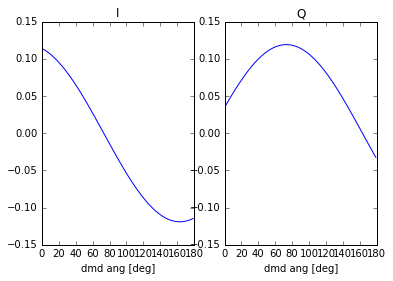

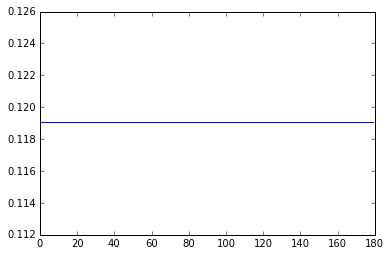

In [8]:
dmd_ang=np.linspace(0., 179, 180)*np.pi/180.
P_36_tot=np.zeros([len(dmd_ang), 2])

E9p=E_bs_t_ideal[0, :]
E9n=E_bs_t_ideal[1, :]
E45p=E_bs_t_ideal[2, :]
E45n=E_bs_t_ideal[3, :]
for z in range(len(dmd_ang)):
    P_36_tot[z, :]=SB.BeatNote(E45p[0], E9p[0], dmd_ang[z])\
                +SB.BeatNote(E45p[1], E9p[1], dmd_ang[z])\
                +SB.BeatNote(E45p[2], E9p[2], dmd_ang[z])\
                +SB.BeatNote(E9n[0], E45n[0], dmd_ang[z])\
                +SB.BeatNote(E9n[1], E45n[1], dmd_ang[z])\
                +SB.BeatNote(E9n[2], E45n[2], dmd_ang[z])

fig=plt.figure()
ax=fig.add_subplot(121)
ax.plot(dmd_ang*180./np.pi, P_36_tot[:, 0])
ax.set_xlabel('dmd ang [deg]')
ax.set_title('I')
ax=fig.add_subplot(122, sharey=ax)
ax.plot(dmd_ang*180./np.pi, P_36_tot[:, 1])
ax.set_xlabel('dmd ang [deg]')
ax.set_title('Q')
plt.show()

plt.figure()
plt.plot(dmd_ang*180./np.pi, np.sqrt(P_36_tot[:, 0]**2.+P_36_tot[:, 1]**2.))
# plt.ylim([5.5e-6, 6.5e-6])
plt.show()

# total power does not change w.r.t. demod phase and non-zero!!!
# make sense right now

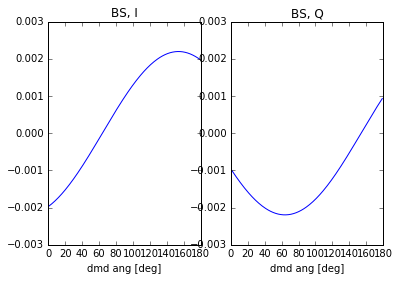

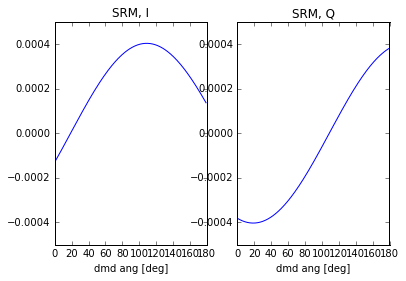

85.0


In [9]:
# phase dmd_ang s.t. P_bs_36 shows up mostly in Q
# neglect 20 at this point
P_bs_36_wfs=np.zeros([len(dmd_ang), 2])
P_srm_36_wfs=np.zeros([len(dmd_ang), 2])

E9p_srm=E_srm_t_ideal[0, :]
E9n_srm=E_srm_t_ideal[1, :]
E45p_srm=E_srm_t_ideal[2, :]
E45n_srm=E_srm_t_ideal[3, :]

for z in range(len(dmd_ang)):
    P_bs_36_wfs[z, :]=SB.BeatNote(E45p[0], E9p[1], dmd_ang[z])\
                    +SB.BeatNote(E45p[1], E9p[0], dmd_ang[z])\
                    +SB.BeatNote(E9n[0], E45n[1], dmd_ang[z])\
                    +SB.BeatNote(E9n[1], E45n[0], dmd_ang[z])
                
    P_srm_36_wfs[z, :]=SB.BeatNote(E45p_srm[0], E9p_srm[1], dmd_ang[z])\
                    +SB.BeatNote(E45p_srm[1], E9p_srm[0], dmd_ang[z])\
                    +SB.BeatNote(E9n_srm[0], E45n_srm[1], dmd_ang[z])\
                    +SB.BeatNote(E9n_srm[1], E45n_srm[0], dmd_ang[z])
                
fig=plt.figure()
ax=fig.add_subplot(121)
ax.plot(dmd_ang*180./np.pi, P_bs_36_wfs[:, 0])
ax.set_xlabel('dmd ang [deg]')
ax.set_title('BS, I')
ax=fig.add_subplot(122, sharey=ax)
ax.plot(dmd_ang*180./np.pi, P_bs_36_wfs[:, 1])
ax.set_xlabel('dmd ang [deg]')
ax.set_title('BS, Q')
plt.show()

fig=plt.figure()
ax=fig.add_subplot(121)
ax.plot(dmd_ang*180./np.pi, P_srm_36_wfs[:, 0])
ax.set_xlabel('dmd ang [deg]')
ax.set_title('SRM, I')
ax=fig.add_subplot(122, sharey=ax)
ax.plot(dmd_ang*180./np.pi, P_srm_36_wfs[:, 1])
ax.set_xlabel('dmd ang [deg]')
ax.set_title('SRM, Q')
plt.show()

# indx=np.where(np.abs(P_bs_36_wfs[:, 1])==np.max(np.abs(P_bs_36_wfs[:, 1])))[0]
indx=85
dmd_ang_36=dmd_ang[indx]
# dmd_ang_36=80.*np.pi/180.
print( dmd_ang_36*180./np.pi)

# set the demod phase s.t. the BS signal mostly in Q and SRM signal mostly in I

In [10]:
print ('AS 36 for BS')
print (P_bs_36_wfs[indx, :])
print (SB.BeatNote(E45p[0], E9p[1], dmd_ang_36), '45_00 * 9_10')
print (SB.BeatNote(E9n[1], E45n[0], dmd_ang_36), '-9_10 * 45_00')
print (SB.BeatNote(E45p[1], E9p[0], dmd_ang_36), '45_10 * 9_00')
print (SB.BeatNote(E9n[0], E45n[1], dmd_ang_36), '-9_00 * -45_10')

print ('AS 36 for SRM')
print (P_srm_36_wfs[indx, :])
print (SB.BeatNote(E45p_srm[0], E9p_srm[1], dmd_ang_36), '45_00 * 9_10')
print (SB.BeatNote(E9n_srm[1], E45n_srm[0], dmd_ang_36), '-9_10 * -45_00')
print (SB.BeatNote(E45p_srm[1], E9p_srm[0], dmd_ang_36), '45_10 * 9_00')
print (SB.BeatNote(E9n_srm[0], E45n_srm[1], dmd_ang_36), '-9_00 * -45_10')

# 36 for BS dominated by 45_00*9_10 and -9_10*-45_00
# 36 for SRM seems to be quite tricky
# many terms with similar amp but op. sign!

AS 36 for BS
[ 0.00079013 -0.00204837]
[-0.00078729 -0.00084381] 45_00 * 9_10
[ 0.00150694 -0.00069096] -9_10 * 45_00
[ -5.56448742e-05  -2.73196614e-04] 45_10 * 9_00
[ 0.00012613 -0.00024041] -9_00 * -45_10
AS 36 for SRM
[ 0.0003684  -0.00016249]
[ 0.00030038  0.00044489] 45_00 * 9_10
[-0.00021156  0.00074235] -9_10 * -45_00
[-0.00063914 -0.00085895] 45_10 * 9_00
[ 0.00091871 -0.00049077] -9_00 * -45_10


In [11]:
# phase the 18 and 90 AS signal s.t. the sum (00*00 dominated) shows up in I

dmd_ang_18=SB.find_dmd_ang(E_bs_t_ideal[0, 0], E_bs_t_ideal[1, 0])
dmd_ang_90=SB.find_dmd_ang(E_bs_t_ideal[2, 0], E_bs_t_ideal[3, 0])
print ('18:', dmd_ang_18*180./np.pi, '90:', dmd_ang_90*180./np.pi)
print (SB.BeatNote(E_bs_t_ideal[0, 0], E_bs_t_ideal[1, 0], dmd_ang_18), '18, SUM')
print (SB.BeatNote(E_bs_t_ideal[2, 0], E_bs_t_ideal[3, 0], dmd_ang_90), '90, SUM' )

print (SB.BeatNote(E_bs_t_ideal[0, 0], E_bs_t_ideal[1, 1], dmd_ang_18)\
    +SB.BeatNote(E_bs_t_ideal[0, 1], E_bs_t_ideal[1, 0], dmd_ang_18), '18, WFS')
print (SB.BeatNote(E_bs_t_ideal[2, 0], E_bs_t_ideal[3, 1], dmd_ang_18)\
    +SB.BeatNote(E_bs_t_ideal[3, 1], E_bs_t_ideal[2, 0], dmd_ang_18), '90, WFS')
    
# 18 MHz much larger than 90 MHz (normed by sum)
# 18 ~ 1/40=0.025; 90 ~ 0.007/1=0.007
# but somehow my signal shows up in I phase mostly

18: -328.388967276 90: 357.750761037
[  3.75096723e-03  -2.60208521e-18] 18, SUM
[  9.44944431e-01   9.36750677e-17] 90, SUM
[ -1.03973753e-04   2.43738548e-05] 18, WFS
[-0.0069799  -0.00429592] 90, WFS


In [12]:
"""
now tilt BS for a fixed amout
change ITMX R.O.C. without changing gouy phase in SRC/PRC...
should be okay as the beam waist is far away from the ITMs
"""
dRocx_list=np.arange(-3.e-2, 3.e-2, 1.e-3)
E_bs_t_list=np.zeros([len(w_list), 3, len(dRocx_list)], dtype=np.complex)
E_bs_r_list=np.zeros([len(w_list), 3, len(dRocx_list)], dtype=np.complex)

for y in range(len(w_list)):
    for z in range(len(dRocx_list)):
        E_bs_t_list[y, :, z]=SB.t_dm(w_list[y], dRocx=dRocx_list[z], Th_BS=1.e-2)[:, 0] * np.sign(w_list[y])
        E_bs_r_list[y, :, z]=SB.r_dm(w_list[y], dRocx=dRocx_list[z], Th_BS=1.e-2)[:, 0] * np.sign(w_list[y])

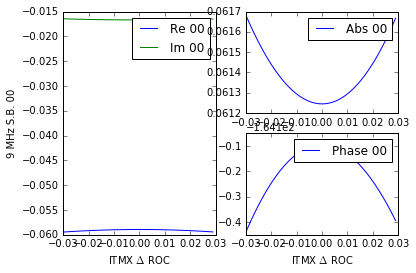

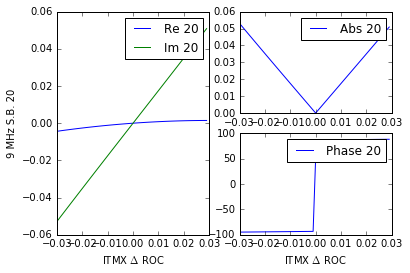

In [13]:
# plot the fields 

mode=['00', '10', '20']
for mode_num in range(3):
    fig=plt.figure()
    ax1=fig.add_subplot(121)
    ax1.plot(dRocx_list, np.real(E_bs_t_list[0, mode_num, :]), label='Re %s'%mode[mode_num]) 
    ax1.plot(dRocx_list, np.imag(E_bs_t_list[0, mode_num, :]), label='Im %s'%mode[mode_num])
    ax1.set_xlabel(r'ITMX $\Delta$ ROC')
    ax1.set_ylabel(r'9 MHz S.B. %s'%mode[mode_num])
    ax1.legend()
    ax2=fig.add_subplot(222)
    ax2.plot(dRocx_list, np.abs(E_bs_t_list[0, mode_num, :]), label='Abs %s'%mode[mode_num])
    ax2.legend()
    ax3=fig.add_subplot(224)
    ax3.plot(dRocx_list, np.angle(E_bs_t_list[0, mode_num, :], deg=True), label='Phase %s'%mode[mode_num])
    ax3.set_xlabel(r'ITMX $\Delta$ ROC')
    ax3.legend()

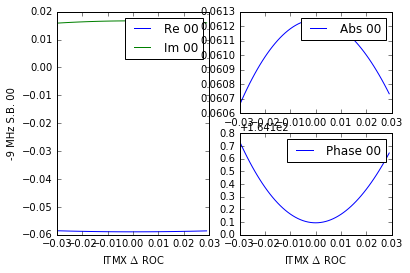

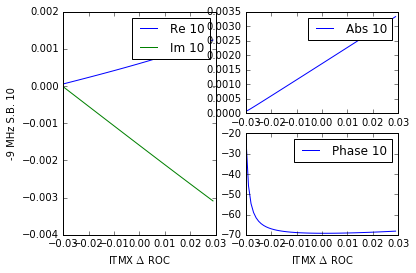

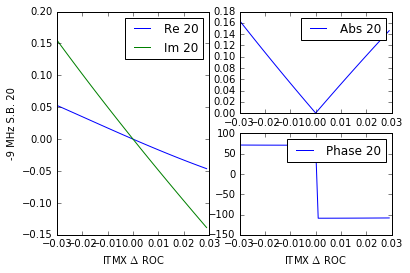

In [14]:
# -9 transmitted
for mode_num in range(3):
    fig=plt.figure()
    ax1=fig.add_subplot(121)
    ax1.plot(dRocx_list, np.real(E_bs_t_list[1, mode_num, :]), label='Re %s'%mode[mode_num]) 
    ax1.plot(dRocx_list, np.imag(E_bs_t_list[1, mode_num, :]), label='Im %s'%mode[mode_num])
    ax1.set_xlabel(r'ITMX $\Delta$ ROC')
    ax1.set_ylabel(r'-9 MHz S.B. %s'%mode[mode_num])
    ax1.legend()
    ax2=fig.add_subplot(222)
    ax2.plot(dRocx_list, np.abs(E_bs_t_list[1, mode_num, :]), label='Abs %s'%mode[mode_num])
    ax2.legend()
    ax3=fig.add_subplot(224)
    ax3.plot(dRocx_list, np.angle(E_bs_t_list[1, mode_num, :], deg=True), label='Phase %s'%mode[mode_num])
    ax3.set_xlabel(r'ITMX $\Delta$ ROC')
    ax3.legend()
    
# large 20 mode compared to 00 
# can affect wfs for BS?

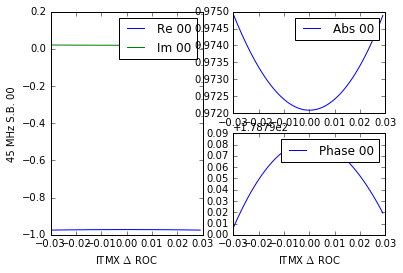

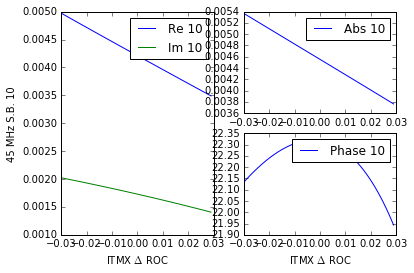

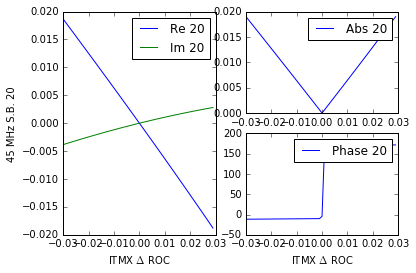

In [15]:
# 45 transmitted
for mode_num in range(3):
    fig=plt.figure()
    ax1=fig.add_subplot(121)
    ax1.plot(dRocx_list, np.real(E_bs_t_list[2, mode_num, :]), label='Re %s'%mode[mode_num]) 
    ax1.plot(dRocx_list, np.imag(E_bs_t_list[2, mode_num, :]), label='Im %s'%mode[mode_num])
    ax1.set_xlabel(r'ITMX $\Delta$ ROC')
    ax1.set_ylabel(r'45 MHz S.B. %s'%mode[mode_num])
    ax1.legend()
    ax2=fig.add_subplot(222)
    ax2.plot(dRocx_list, np.abs(E_bs_t_list[2, mode_num, :]), label='Abs %s'%mode[mode_num])
    ax2.legend()
    ax3=fig.add_subplot(224)
    ax3.plot(dRocx_list, np.angle(E_bs_t_list[2, mode_num, :], deg=True), label='Phase %s'%mode[mode_num])
    ax3.set_xlabel(r'ITMX $\Delta$ ROC')
    ax3.legend()

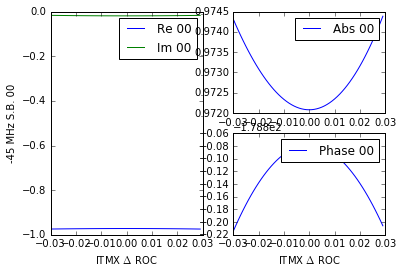

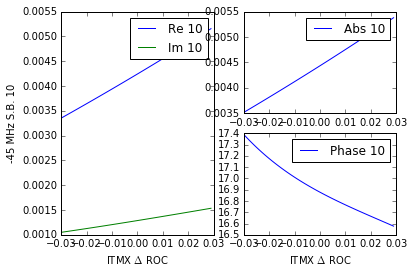

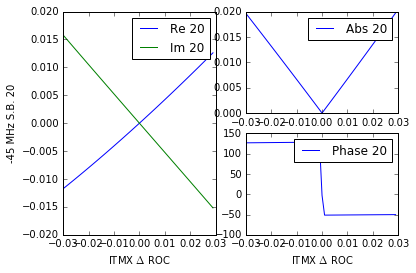

In [16]:
# -45 transmitted
for mode_num in range(3):
    fig=plt.figure()
    ax1=fig.add_subplot(121)
    ax1.plot(dRocx_list, np.real(E_bs_t_list[3, mode_num, :]), label='Re %s'%mode[mode_num]) 
    ax1.plot(dRocx_list, np.imag(E_bs_t_list[3, mode_num, :]), label='Im %s'%mode[mode_num])
    ax1.set_xlabel(r'ITMX $\Delta$ ROC')
    ax1.set_ylabel(r'-45 MHz S.B. %s'%mode[mode_num])
    ax1.legend()
    ax2=fig.add_subplot(222)
    ax2.plot(dRocx_list, np.abs(E_bs_t_list[3, mode_num, :]), label='Abs %s'%mode[mode_num])
    ax2.legend()
    ax3=fig.add_subplot(224)
    ax3.plot(dRocx_list, np.angle(E_bs_t_list[3, mode_num, :], deg=True), label='Phase %s'%mode[mode_num])
    ax3.set_xlabel(r'ITMX $\Delta$ ROC')
    ax3.legend()

In [17]:
P_bs_t_36_wfs=np.zeros([2, len(dRocx_list)])
P_bs_t_36_tot=np.zeros([2, len(dRocx_list)])
P_bs_t_90_wfs=np.zeros([2, len(dRocx_list)])
P_bs_t_90_tot=np.zeros([2, len(dRocx_list)])
P_bs_t_18_wfs=np.zeros([2, len(dRocx_list)])
P_bs_t_18_tot=np.zeros([2, len(dRocx_list)])

P_bs_t_36_01=np.zeros([2, len(dRocx_list)]) # contribution to wfs signal from 00*10 
P_bs_t_36_12=np.zeros([2, len(dRocx_list)]) # contribution to wfs signal from 10*20

# first check demod angles
print (dmd_ang_36*180./np.pi, 'dmd ang for 36')
print (dmd_ang_18*180./np.pi, 'dmd ang for 18')
print (dmd_ang_90*180./np.pi, 'dmd ang for 90')

for z in range(len(dRocx_list)):
    E9p=E_bs_t_list[0, :, z]
    E9n=E_bs_t_list[1, :, z]
    E45p=E_bs_t_list[2, :, z]
    E45n=E_bs_t_list[3, :, z]
    
    P_bs_t_36_tot[:, z]=SB.BeatNote(E45p[0], E9p[0], dmd_ang_36)\
                +SB.BeatNote(E45p[1], E9p[1], dmd_ang_36)\
                +SB.BeatNote(E45p[2], E9p[2], dmd_ang_36)\
                +SB.BeatNote(E9n[0], E45n[0], dmd_ang_36)\
                +SB.BeatNote(E9n[1], E45n[1], dmd_ang_36)\
                +SB.BeatNote(E9n[2], E45n[2], dmd_ang_36)
            
    P_bs_t_36_wfs[:, z]=SB.BeatNote(E45p[0], E9p[1], dmd_ang_36)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E45p[1], E9p[0], dmd_ang_36)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E9n[0], E45n[1], dmd_ang_36)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E9n[1], E45n[0], dmd_ang_36)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E45p[2], E9p[1], dmd_ang_36)*np.sqrt(1./np.pi)\
                +SB.BeatNote(E45p[1], E9p[2], dmd_ang_36)*np.sqrt(1./np.pi)\
                +SB.BeatNote(E9n[2], E45n[1], dmd_ang_36)*np.sqrt(1./np.pi)\
                +SB.BeatNote(E9n[1], E45n[2], dmd_ang_36)*np.sqrt(1./np.pi)
                
    P_bs_t_36_01[:, z]=SB.BeatNote(E45p[0], E9p[1], dmd_ang_36)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E45p[1], E9p[0], dmd_ang_36)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E9n[0], E45n[1], dmd_ang_36)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E9n[1], E45n[0], dmd_ang_36)*np.sqrt(2./np.pi)
    P_bs_t_36_12[:, z]=SB.BeatNote(E45p[2], E9p[1], dmd_ang_36)*np.sqrt(1./np.pi)\
                +SB.BeatNote(E45p[1], E9p[2], dmd_ang_36)*np.sqrt(1./np.pi)\
                +SB.BeatNote(E9n[2], E45n[1], dmd_ang_36)*np.sqrt(1./np.pi)\
                +SB.BeatNote(E9n[1], E45n[2], dmd_ang_36)*np.sqrt(1./np.pi)
                
    P_bs_t_18_tot[:, z]=SB.BeatNote(E9p[0], E9n[0], dmd_ang_18)\
                +SB.BeatNote(E9p[1], E9n[1], dmd_ang_18)\
                +SB.BeatNote(E9p[2], E9n[2], dmd_ang_18)
    P_bs_t_18_wfs[:, z]=SB.BeatNote(E9p[0], E9n[1], dmd_ang_18)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E9p[1], E9n[0], dmd_ang_18)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E9p[1], E9n[2], dmd_ang_18)*np.sqrt(1./np.pi)\
                +SB.BeatNote(E9p[2], E9n[1], dmd_ang_18)*np.sqrt(1./np.pi)
                    
    P_bs_t_90_tot[:, z]=SB.BeatNote(E45p[0], E45n[0], dmd_ang_90)\
                +SB.BeatNote(E45p[1], E45n[1], dmd_ang_90)\
                +SB.BeatNote(E45p[2], E45n[2], dmd_ang_90)
    P_bs_t_90_wfs[:, z]=SB.BeatNote(E45p[0], E45n[1], dmd_ang_90)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E45p[1], E45n[0], dmd_ang_90)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E45p[1], E45n[2], dmd_ang_90)*np.sqrt(1./np.pi)\
                +SB.BeatNote(E45p[2], E45n[1], dmd_ang_90)*np.sqrt(1./np.pi)
                
P_bs_t_36_tot=np.sqrt(P_bs_t_36_tot[0, :]**2.+P_bs_t_36_tot[1, :]**2.)
P_bs_t_18_tot=np.sqrt(P_bs_t_18_tot[0, :]**2.+P_bs_t_18_tot[1, :]**2.)
P_bs_t_90_tot=np.sqrt(P_bs_t_90_tot[0, :]**2.+P_bs_t_90_tot[1, :]**2.)

85.0 dmd ang for 36
-328.388967276 dmd ang for 18
357.750761037 dmd ang for 90


In [18]:
"""
now consider power
first BS misaligned while holding SRM perfectly aligned
"""

'\nnow consider power\nfirst BS misaligned while holding SRM perfectly aligned\n'

In [19]:
# plot powers 
fig=plt.figure()
ax=fig.add_subplot(121)
ax.plot(dRocx_list, P_bs_t_36_wfs[0, :]/P_bs_t_36_tot, label='tot')
ax.plot(dRocx_list, P_bs_t_36_01[0, :]/P_bs_t_36_tot, label='10*00')
ax.plot(dRocx_list, P_bs_t_36_12[0, :]/P_bs_t_36_tot, label='20*00')
ax.set_xlabel('dRoC_x')
ax.set_title('AS 36 I')
ax.legend(loc='lower right')
ax=fig.add_subplot(122, sharey=ax)
ax.plot(dRocx_list, P_bs_t_36_wfs[1, :]/P_bs_t_36_tot, label='tot')
ax.plot(dRocx_list, P_bs_t_36_01[1, :]/P_bs_t_36_tot, label='10*00')
ax.plot(dRocx_list, P_bs_t_36_12[1, :]/P_bs_t_36_tot, label='20*00')
ax.set_xlabel('dRoC_x')
ax.set_title('AS 36 Q')
# ax.legend()
plt.show()

# Q is not affected by a lot
# I on the other hand can change a lot... and have a sign flipping
# may affect SRM control???

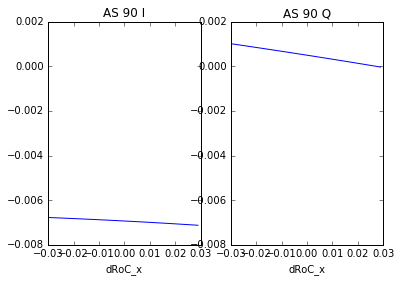

In [20]:
# 90 signals for centering for BS misalignment

fig=plt.figure()
ax=fig.add_subplot(121)
ax.plot(dRocx_list, P_bs_t_90_wfs[0, :]/P_bs_t_90_tot)
ax.set_xlabel('dRoC_x')
ax.set_title('AS 90 I')

ax=fig.add_subplot(122, sharey=ax)
ax.plot(dRocx_list, P_bs_t_90_wfs[1, :]/P_bs_t_90_tot)
ax.set_xlabel('dRoC_x')
ax.set_title('AS 90 Q')
plt.show()

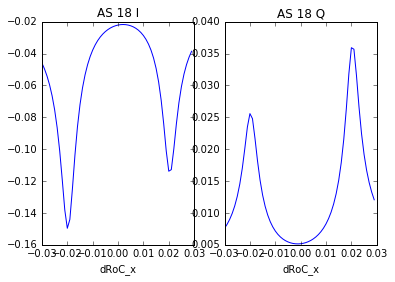

In [21]:
# 18 for centering for BS
fig=plt.figure()
ax=fig.add_subplot(121)
ax.plot(dRocx_list, P_bs_t_18_wfs[0, :]/P_bs_t_18_tot)
ax.set_xlabel('dRoC_x')
ax.set_title('AS 18 I')

ax=fig.add_subplot(122)
ax.plot(dRocx_list, P_bs_t_18_wfs[1, :]/P_bs_t_18_tot)
ax.set_xlabel('dRoC_x')
ax.set_title('AS 18 Q')
plt.show()

# have peaks
# but may be fine as sign stays the same
# just larger signal!!! 
# and always much larger than 90

In [22]:
"""
now misalign SRM
"""

'\nnow misalign SRM\n'

In [23]:
E_srm_t_list=np.zeros([len(w_list), 3, len(dRocx_list)], dtype=np.complex)
E_srm_r_list=np.zeros([len(w_list), 3, len(dRocx_list)], dtype=np.complex)

for y in range(len(w_list)):
    for z in range(len(dRocx_list)):
        E_srm_t_list[y, :, z]=SB.t_dm(w_list[y], dRocx=dRocx_list[z], Th_SRM=1.e-2)[:, 0] * np.sign(w_list[y])
        E_srm_r_list[y, :, z]=SB.r_dm(w_list[y], dRocx=dRocx_list[z], Th_SRM=1.e-2)[:, 0] * np.sign(w_list[y])

In [24]:
P_srm_t_36_wfs=np.zeros([2, len(dRocx_list)])
P_srm_t_36_tot=np.zeros([2, len(dRocx_list)])
P_srm_t_90_wfs=np.zeros([2, len(dRocx_list)])
P_srm_t_90_tot=np.zeros([2, len(dRocx_list)])
P_srm_t_18_wfs=np.zeros([2, len(dRocx_list)])
P_srm_t_18_tot=np.zeros([2, len(dRocx_list)])

P_srm_t_36_01=np.zeros([2, len(dRocx_list)]) # contribution to wfs signal from 00*10 
P_srm_t_36_12=np.zeros([2, len(dRocx_list)]) # contribution to wfs signal from 10*20

# dmd angle has been set for optimizing BS signals

for z in range(len(dRocx_list)):
    E9p=E_srm_t_list[0, :, z]
    E9n=E_srm_t_list[1, :, z]
    E45p=E_srm_t_list[2, :, z]
    E45n=E_srm_t_list[3, :, z]
    
    P_srm_t_36_tot[:, z]=SB.BeatNote(E45p[0], E9p[0], dmd_ang_36)\
                +SB.BeatNote(E45p[1], E9p[1], dmd_ang_36)\
                +SB.BeatNote(E45p[2], E9p[2], dmd_ang_36)\
                +SB.BeatNote(E9n[0], E45n[0], dmd_ang_36)\
                +SB.BeatNote(E9n[1], E45n[1], dmd_ang_36)\
                +SB.BeatNote(E9n[2], E45n[2], dmd_ang_36)
            
    P_srm_t_36_wfs[:, z]=SB.BeatNote(E45p[0], E9p[1], dmd_ang_36)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E45p[1], E9p[0], dmd_ang_36)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E9n[0], E45n[1], dmd_ang_36)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E9n[1], E45n[0], dmd_ang_36)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E45p[2], E9p[1], dmd_ang_36)*np.sqrt(1./np.pi)\
                +SB.BeatNote(E45p[1], E9p[2], dmd_ang_36)*np.sqrt(1./np.pi)\
                +SB.BeatNote(E9n[2], E45n[1], dmd_ang_36)*np.sqrt(1./np.pi)\
                +SB.BeatNote(E9n[1], E45n[2], dmd_ang_36)*np.sqrt(1./np.pi)
                
    P_srm_t_36_01[:, z]=SB.BeatNote(E45p[0], E9p[1], dmd_ang_36)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E45p[1], E9p[0], dmd_ang_36)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E9n[0], E45n[1], dmd_ang_36)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E9n[1], E45n[0], dmd_ang_36)*np.sqrt(2./np.pi)
    P_srm_t_36_12[:, z]=SB.BeatNote(E45p[2], E9p[1], dmd_ang_36)*np.sqrt(1./np.pi)\
                +SB.BeatNote(E45p[1], E9p[2], dmd_ang_36)*np.sqrt(1./np.pi)\
                +SB.BeatNote(E9n[2], E45n[1], dmd_ang_36)*np.sqrt(1./np.pi)\
                +SB.BeatNote(E9n[1], E45n[2], dmd_ang_36)*np.sqrt(1./np.pi)
                
    P_srm_t_18_tot[:, z]=SB.BeatNote(E9p[0], E9n[0], dmd_ang_18)\
                +SB.BeatNote(E9p[1], E9n[1], dmd_ang_18)\
                +SB.BeatNote(E9p[2], E9n[2], dmd_ang_18)
    P_srm_t_18_wfs[:, z]=SB.BeatNote(E9p[0], E9n[1], dmd_ang_18)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E9p[1], E9n[0], dmd_ang_18)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E9p[1], E9n[2], dmd_ang_18)*np.sqrt(1./np.pi)\
                +SB.BeatNote(E9p[2], E9n[1], dmd_ang_18)*np.sqrt(1./np.pi)
                    
    P_srm_t_90_tot[:, z]=SB.BeatNote(E45p[0], E45n[0], dmd_ang_90)\
                +SB.BeatNote(E45p[1], E45n[1], dmd_ang_90)\
                +SB.BeatNote(E45p[2], E45n[2], dmd_ang_90)
    P_srm_t_90_wfs[:, z]=SB.BeatNote(E45p[0], E45n[1], dmd_ang_90)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E45p[1], E45n[0], dmd_ang_90)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E45p[1], E45n[2], dmd_ang_90)*np.sqrt(1./np.pi)\
                +SB.BeatNote(E45p[2], E45n[1], dmd_ang_90)*np.sqrt(1./np.pi)
                
P_srm_t_36_tot=np.sqrt(P_srm_t_36_tot[0, :]**2.+P_srm_t_36_tot[1, :]**2.)
P_srm_t_18_tot=np.sqrt(P_srm_t_18_tot[0, :]**2.+P_srm_t_18_tot[1, :]**2.)
P_srm_t_90_tot=np.sqrt(P_srm_t_90_tot[0, :]**2.+P_srm_t_90_tot[1, :]**2.)

In [25]:
# plot powers 
fig=plt.figure()
ax=fig.add_subplot(121)
ax.plot(dRocx_list, P_srm_t_36_wfs[0, :]/P_srm_t_36_tot, label='tot')
ax.plot(dRocx_list, P_srm_t_36_01[0, :]/P_srm_t_36_tot, label='10*00')
ax.plot(dRocx_list, P_srm_t_36_12[0, :]/P_srm_t_36_tot, label='20*00')
ax.set_xlabel('dRoC_x')
ax.set_title('AS 36 I (SRM)')
ax.legend(loc='lower right')
ax=fig.add_subplot(122, sharey=ax)
ax.plot(dRocx_list, P_srm_t_36_wfs[1, :]/P_srm_t_36_tot, label='tot')
ax.plot(dRocx_list, P_srm_t_36_01[1, :]/P_srm_t_36_tot, label='10*00')
ax.plot(dRocx_list, P_srm_t_36_12[1, :]/P_srm_t_36_tot, label='20*00')
ax.set_xlabel('dRoC_x')
ax.set_title('AS 36 Q (SRM)')
# ax.legend()
plt.show()

print (P_srm_t_36_wfs[:, 30]/P_srm_t_36_tot[30])
# this seemed to be extremely hard to be controled?
# consistent with Den's suggestion?

[ 0.00246875 -0.00109313]


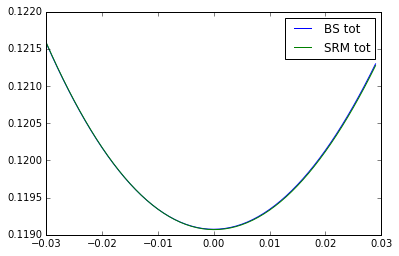

In [26]:
# The sum channel should not be able to distinguish BS/SRM signal
# plot total and see if it affects the BS control

plt.plot(dRocx_list, P_bs_t_36_tot, label='BS tot')
plt.plot(dRocx_list, P_srm_t_36_tot, label='SRM tot')
plt.legend()
plt.show()

# actually it is fine...
# always dominated by 00*00 which is not affected much by misalignment 

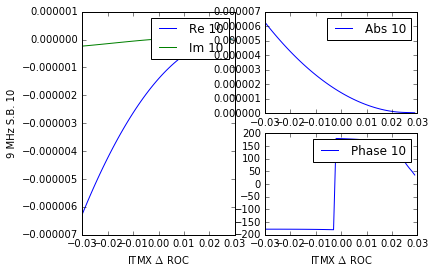

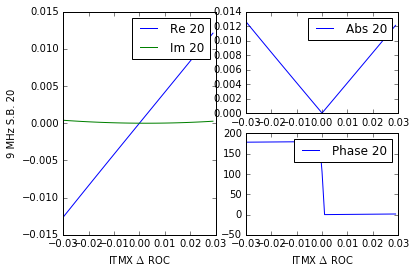

In [27]:
# seems that we have to use refl for SRM control
# first see how the field behaves

for mode_num in range(3):
    fig=plt.figure()
    ax1=fig.add_subplot(121)
    ax1.plot(dRocx_list, np.real(E_srm_r_list[0, mode_num, :]), label='Re %s'%mode[mode_num]) 
    ax1.plot(dRocx_list, np.imag(E_srm_r_list[0, mode_num, :]), label='Im %s'%mode[mode_num])
    ax1.set_xlabel(r'ITMX $\Delta$ ROC')
    ax1.set_ylabel(r'9 MHz S.B. %s'%mode[mode_num])
    ax1.legend()
    ax2=fig.add_subplot(222)
    ax2.plot(dRocx_list, np.abs(E_srm_r_list[0, mode_num, :]), label='Abs %s'%mode[mode_num])
    ax2.legend()
    ax3=fig.add_subplot(224)
    ax3.plot(dRocx_list, np.angle(E_srm_r_list[0, mode_num, :], deg=True), label='Phase %s'%mode[mode_num])
    ax3.set_xlabel(r'ITMX $\Delta$ ROC')
    ax3.legend()
    
# almost no 10 signal
# as expected because 9 should be dark in SRC

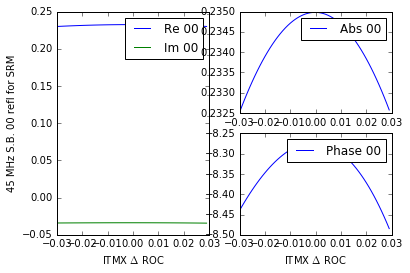

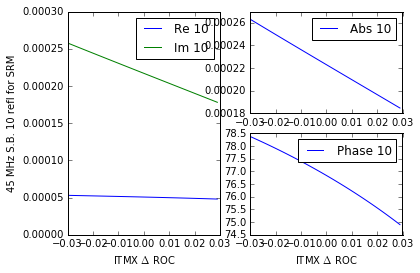

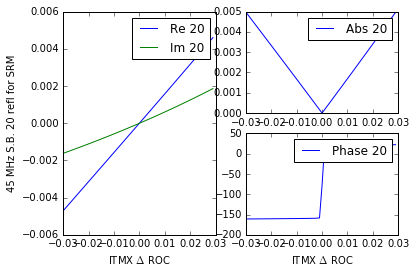

In [28]:
for mode_num in range(3):
    fig=plt.figure()
    ax1=fig.add_subplot(121)
    ax1.plot(dRocx_list, np.real(E_srm_r_list[2, mode_num, :]), label='Re %s'%mode[mode_num]) 
    ax1.plot(dRocx_list, np.imag(E_srm_r_list[2, mode_num, :]), label='Im %s'%mode[mode_num])
    ax1.set_xlabel(r'ITMX $\Delta$ ROC')
    ax1.set_ylabel(r'45 MHz S.B. %s refl for SRM'%mode[mode_num])
    ax1.legend()
    ax2=fig.add_subplot(222)
    ax2.plot(dRocx_list, np.abs(E_srm_r_list[2, mode_num, :]), label='Abs %s'%mode[mode_num])
    ax2.legend()
    ax3=fig.add_subplot(224)
    ax3.plot(dRocx_list, np.angle(E_srm_r_list[2, mode_num, :], deg=True), label='Phase %s'%mode[mode_num])
    ax3.set_xlabel(r'ITMX $\Delta$ ROC')
    ax3.legend()
    
# seems to behave well?
# phase of 10 stable

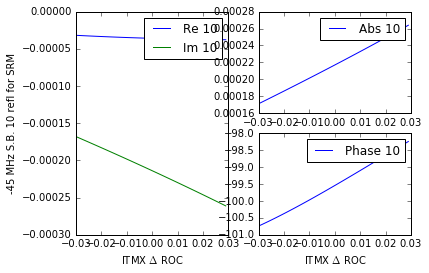

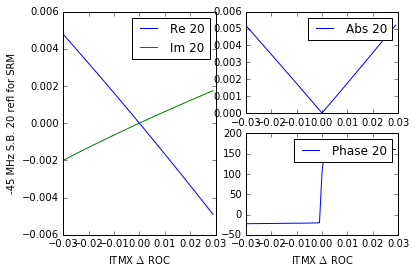

In [29]:
for mode_num in range(3):
    fig=plt.figure()
    ax1=fig.add_subplot(121)
    ax1.plot(dRocx_list, np.real(E_srm_r_list[3, mode_num, :]), label='Re %s'%mode[mode_num]) 
    ax1.plot(dRocx_list, np.imag(E_srm_r_list[3, mode_num, :]), label='Im %s'%mode[mode_num])
    ax1.set_xlabel(r'ITMX $\Delta$ ROC')
    ax1.set_ylabel(r'-45 MHz S.B. %s refl for SRM'%mode[mode_num])
    ax1.legend()
    ax2=fig.add_subplot(222)
    ax2.plot(dRocx_list, np.abs(E_srm_r_list[3, mode_num, :]), label='Abs %s'%mode[mode_num])
    ax2.legend()
    ax3=fig.add_subplot(224)
    ax3.plot(dRocx_list, np.angle(E_srm_r_list[3, mode_num, :], deg=True), label='Phase %s'%mode[mode_num])
    ax3.set_xlabel(r'ITMX $\Delta$ ROC')
    ax3.legend()

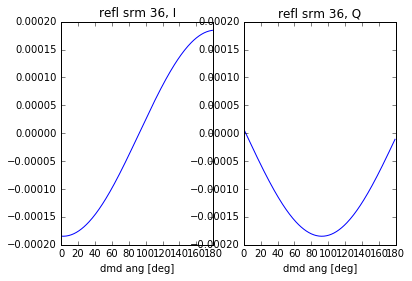

[ -8.17248219e-06  -1.83489421e-05]
[  1.14642395e-05  -8.58389349e-05]


In [30]:
# consider power for both 36 and 90
# assume at this stage BS and PRM are already controlled 
# neglect contamination from other tilting signals

# first find demod angle

P_refl_90_wfs=np.zeros([len(dmd_ang), 2])
P_refl_36_wfs=np.zeros([len(dmd_ang), 2])

E9p_srm=E_srm_r_ideal[0, :]
E9n_srm=E_srm_r_ideal[1, :]
E45p_srm=E_srm_r_ideal[2, :]
E45n_srm=E_srm_r_ideal[3, :]

P_refl_90_tot=SB.BeatNote(E45p_srm[0], E45n_srm[0], 0.)
P_refl_90_tot=np.sqrt(P_refl_90_tot[0]**2.+P_refl_90_tot[1]**2.)
P_refl_36_tot=SB.BeatNote(E45p_srm[0], E9p_srm[0], 0.)\
        +SB.BeatNote(E9n_srm[0], E45n_srm[0], 0.)
P_refl_36_tot=np.sqrt(P_refl_36_tot[0]**2.+P_refl_36_tot[1]**2.)

for z in range(len(dmd_ang)):
    P_refl_90_wfs[z, :]=SB.BeatNote(E45p_srm[0], E45n_srm[1], dmd_ang[z])\
                    +SB.BeatNote(E45p_srm[1], E45n_srm[0], dmd_ang[z])\
                    +SB.BeatNote(E45p_srm[2], E45n_srm[1], dmd_ang[z])/1.4\
                    +SB.BeatNote(E45p_srm[1], E45n_srm[2], dmd_ang[z])/1.4
                
    P_refl_36_wfs[z, :]=SB.BeatNote(E45p_srm[1], E9p_srm[0], dmd_ang[z])\
                    +SB.BeatNote(E9n_srm[0], E45n_srm[1], dmd_ang[z]) # only 45_10 * 9_00 should matter
                
fig=plt.figure()
ax=fig.add_subplot(121)
ax.plot(dmd_ang*180./np.pi, P_refl_90_wfs[:, 0]/P_refl_90_tot)
ax.set_xlabel('dmd ang [deg]')
ax.set_title('refl srm 90, I')
ax=fig.add_subplot(122, sharey=ax)
ax.plot(dmd_ang*180./np.pi, P_refl_90_wfs[:, 1]/P_refl_90_tot)
ax.set_xlabel('dmd ang [deg]')
ax.set_title('refl srm 90, Q')
plt.show()

fig=plt.figure()
ax=fig.add_subplot(121)
ax.plot(dmd_ang*180./np.pi, P_refl_36_wfs[:, 0]/P_refl_36_tot)
ax.set_xlabel('dmd ang [deg]')
ax.set_title('refl srm 36, I')
ax=fig.add_subplot(122, sharey=ax)
ax.plot(dmd_ang*180./np.pi, P_refl_36_wfs[:, 1]/P_refl_36_tot)
ax.set_xlabel('dmd ang [deg]')
ax.set_title('refl srm 36, Q')
plt.show()

print (P_refl_90_wfs[60,:])
print (P_refl_36_wfs[100,:])


In [31]:
# set 90 MHz dmd angle to 60
# 36 MHz to 100
dmd_ang_refl90=60.*np.pi/180.
dmd_ang_refl36=100.*np.pi/180.

In [32]:
P_srm_r_36_wfs=np.zeros([2, len(dRocx_list)])
P_srm_r_36_tot=np.zeros([2, len(dRocx_list)])
P_srm_r_90_wfs=np.zeros([2, len(dRocx_list)])
P_srm_r_90_tot=np.zeros([2, len(dRocx_list)])

for z in range(len(dRocx_list)):
    E9p=E_srm_r_list[0, :, z]
    E9n=E_srm_r_list[1, :, z]
    E45p=E_srm_r_list[2, :, z]
    E45n=E_srm_r_list[3, :, z]
    
    P_srm_r_36_tot[:, z]=SB.BeatNote(E45p[0], E9p[0], dmd_ang_refl36)\
                +SB.BeatNote(E45p[1], E9p[1], dmd_ang_refl36)\
                +SB.BeatNote(E45p[2], E9p[2], dmd_ang_refl36)\
                +SB.BeatNote(E9n[0], E45n[0], dmd_ang_refl36)\
                +SB.BeatNote(E9n[1], E45n[1], dmd_ang_refl36)\
                +SB.BeatNote(E9n[2], E45n[2], dmd_ang_refl36)
            
    P_srm_r_36_wfs[:, z]=SB.BeatNote(E45p[0], E9p[1], dmd_ang_refl36)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E45p[1], E9p[0], dmd_ang_refl36)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E9n[0], E45n[1], dmd_ang_refl36)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E9n[1], E45n[0], dmd_ang_refl36)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E45p[2], E9p[1], dmd_ang_refl36)*np.sqrt(1./np.pi)\
                +SB.BeatNote(E45p[1], E9p[2], dmd_ang_refl36)*np.sqrt(1./np.pi)\
                +SB.BeatNote(E9n[2], E45n[1], dmd_ang_refl36)*np.sqrt(1./np.pi)\
                +SB.BeatNote(E9n[1], E45n[2], dmd_ang_refl36)*np.sqrt(1./np.pi)
                
    P_srm_r_90_tot[:, z]=SB.BeatNote(E45p[0], E45n[0], dmd_ang_refl90)\
                +SB.BeatNote(E45p[1], E45n[1], dmd_ang_refl90)\
                +SB.BeatNote(E45p[2], E45n[2], dmd_ang_refl90)
    P_srm_r_90_wfs[:, z]=SB.BeatNote(E45p[0], E45n[1], dmd_ang_refl90)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E45p[1], E45n[0], dmd_ang_refl90)*np.sqrt(2./np.pi)\
                +SB.BeatNote(E45p[1], E45n[2], dmd_ang_refl90)*np.sqrt(1./np.pi)\
                +SB.BeatNote(E45p[2], E45n[1], dmd_ang_refl90)*np.sqrt(1./np.pi)
                
P_srm_r_36_tot=np.sqrt(P_srm_r_36_tot[0, :]**2.+P_srm_r_36_tot[1, :]**2.)
P_srm_r_90_tot=np.sqrt(P_srm_r_90_tot[0, :]**2.+P_srm_r_90_tot[1, :]**2.)

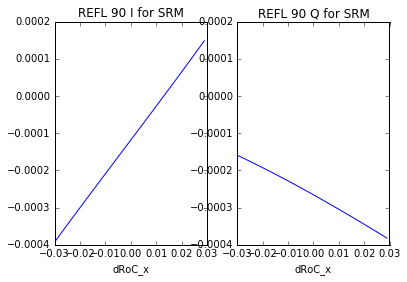

[ -6.52070068e-06  -1.46403444e-05]


In [33]:
# refl 90

fig=plt.figure()
ax=fig.add_subplot(121)
ax.plot(dRocx_list, P_srm_r_90_wfs[0, :]/P_srm_r_90_tot)
ax.set_xlabel('dRoC_x')
ax.set_title('REFL 90 I for SRM')

ax=fig.add_subplot(122, sharey=ax)
ax.plot(dRocx_list, P_srm_r_90_wfs[1, :]/P_srm_r_90_tot)
ax.set_xlabel('dRoC_x')
ax.set_title('REFL 90 Q for SRM')
plt.show()

print (P_srm_r_90_wfs[:, 30])

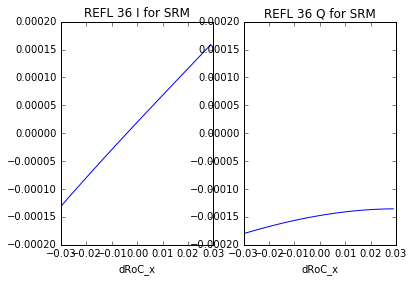

In [34]:
# refl 36

fig=plt.figure()
ax=fig.add_subplot(121)
ax.plot(dRocx_list, P_srm_r_36_wfs[0, :]/P_srm_r_36_tot)
ax.set_xlabel('dRoC_x')
ax.set_title('REFL 36 I for SRM')

ax=fig.add_subplot(122, sharey=ax)
ax.plot(dRocx_list, P_srm_r_36_wfs[1, :]/P_srm_r_36_tot)
ax.set_xlabel('dRoC_x')
ax.set_title('REFL 36 Q for SRM')
plt.show()